In [106]:
import pandas as pd
from utils import make_plot, rmse  

In [107]:
# log_file_path = 'optim_wardi_test.log'
# log_file_path = 'regular_wardi_test.log'
log_file_path = 'loggy.log'
log_file_path = 'loggyT.log'
# log_file_path = 'loggynoT.log'
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,ctrl_callback_time,metadata
0,9.536743e-07,0.007676,-0.008507,0.002857,-0.020709,0.711199,0.009970,-0.000734,0.007765,0.0,0.0,-0.6,0.0,0.474395,0.474395,0.540561,Sim
1,5.409100e-01,0.007676,-0.008507,0.002857,-0.020709,0.725074,0.016001,-0.001206,0.013205,0.0,0.0,-0.6,0.0,0.000206,0.000206,0.002933,jax_reg_wardi
2,5.497451e-01,0.005947,-0.013012,0.005291,-0.020453,0.736146,0.024740,-0.001669,0.016921,0.0,0.0,-0.6,0.0,0.000198,0.000198,0.003064,2x Speed
3,5.598211e-01,0.005942,-0.013135,0.005325,-0.020472,0.744903,0.030457,-0.002044,0.019532,0.0,0.0,-0.6,0.0,0.000261,0.000261,0.003121,helix
4,5.699928e-01,0.005942,-0.013135,0.005325,-0.020472,0.751844,0.034200,-0.002295,0.021361,0.0,0.0,-0.6,0.0,0.000234,0.000234,0.003447,0


In [108]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"Speed: {df_log['metadata'][2]}")
print(f"Trajectory: {df_log['metadata'][3]}")
print(f"Mean NR computation time: {df_log['nr_time'].mean()}")
print(f"Mean NR computation freq: {1/df_log['nr_time'].mean()}")
print(f"Mean callback time: {df_log['ctrl_callback_time'].mean()}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Predictor was: jax_reg_wardi
Speed: 2x Speed
Trajectory: helix
Mean NR computation time: 0.00035279267278177034
Mean NR computation freq: 2834.5259897690044
Mean callback time: 0.0034138305183556068
RMSE: 0.1636523385756745


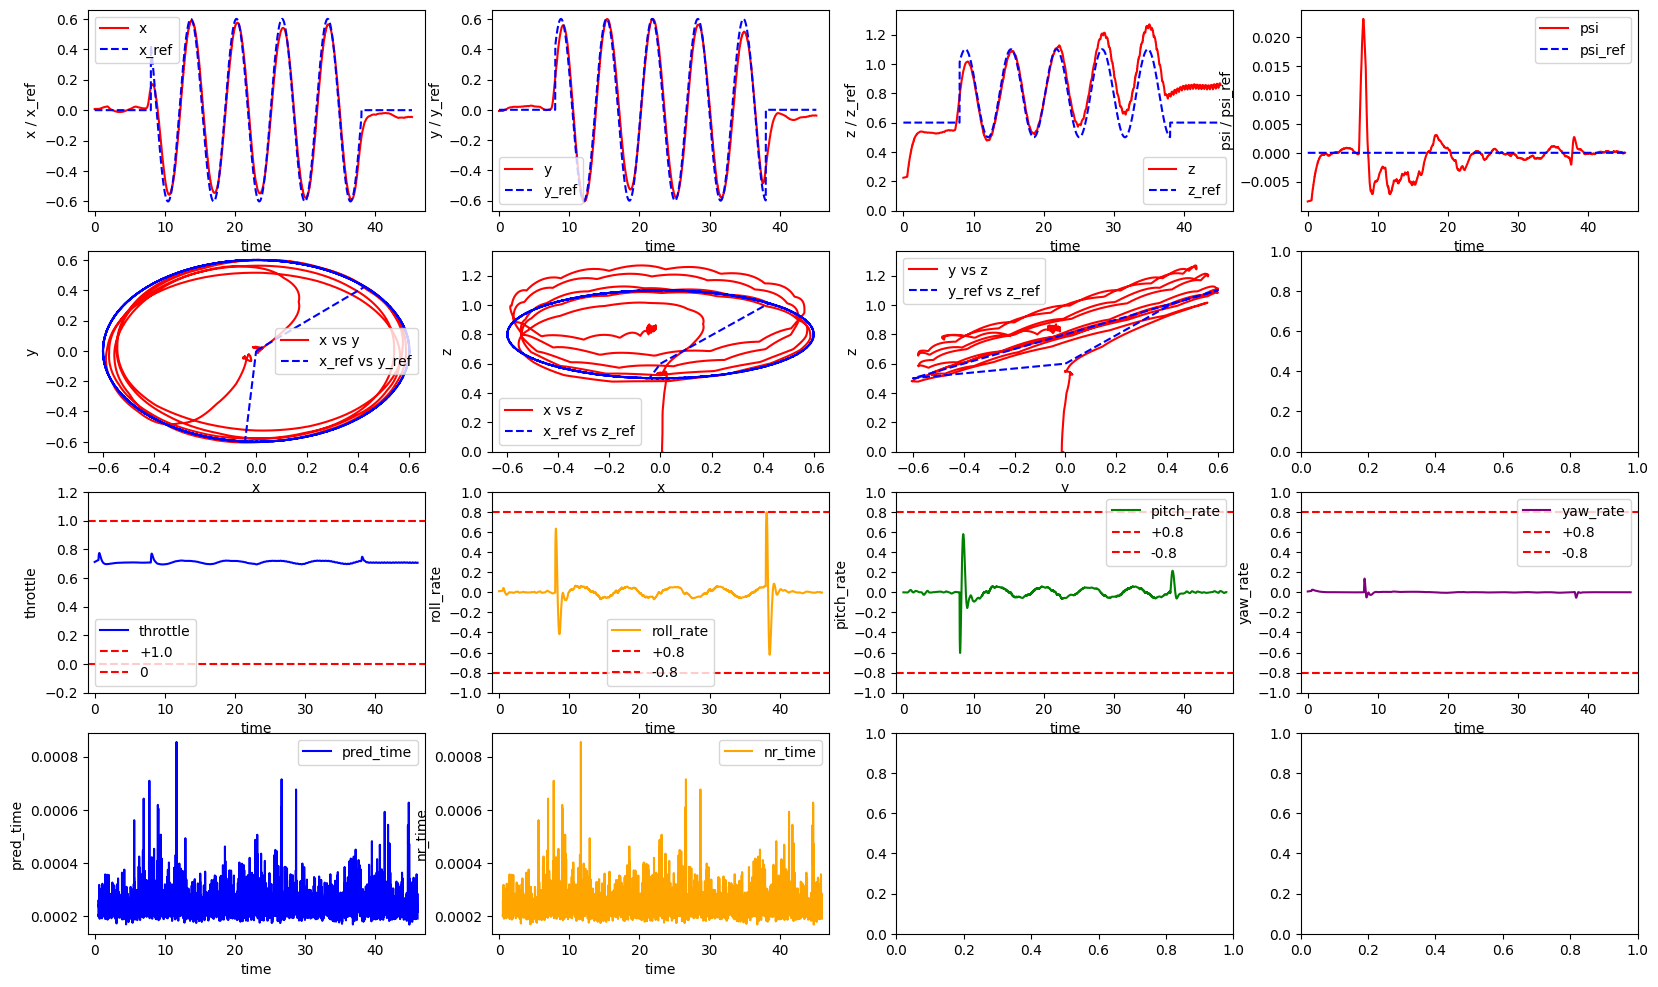

In [109]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)

In [110]:
def circle_horz_ref_func(): #Returns Circle Reference Trajectory in Horizontal Plane ([x,y,z,yaw])
    """ Returns circle reference trajectory in horizontal plane. """
    print("circle_horz_ref_func")

    return [1,1,1,1]

def circle_vert_ref_func(): #Returns Circle Reference Trajectory in Horizontal Plane ([x,y,z,yaw])
    """ Returns circle reference trajectory in horizontal plane. """
    print("circle_horz_ref_func")

    t_traj = self.time_from_start - self.cushion_time
    t = t_traj + self.T_LOOKAHEAD
    
    PERIOD = 13 # used to have w=.5 which is rougly PERIOD = 4*pi ~= 12.56637

    if self.double_speed:
        PERIOD /= 2.0

    w = 2*m.pi / PERIOD
    r = np.array([[.6*m.cos(w*t), .6*m.sin(w*t), -0.7, 0.0]]).T

    return r

In [111]:
# Set main trajectory function
main_traj = circle_horz_ref_func  # Choose the function reference

# Use a dictionary for lookup
trajectory_dictionary = {
    "circle_horz": circle_horz_ref_func,
    "circle_vert": circle_vert_ref_func
}

# Get function name from dictionary
selected_traj = trajectory_dictionary["circle_horz"]
print(selected_traj())  # Calling the selected trajectory function

circle_horz_ref_func
[1, 1, 1, 1]


In [112]:
trajectory_dictionary = {main_traj.__name__: 'circle_horz_ref_func'}

In [113]:
trajectory_dictionary[main_traj]

KeyError: <function circle_horz_ref_func at 0x7f449d1bfc10>

In [ ]:
import numpy as np
import math as m

class TrajectoryGenerator:
    def __init__(self):
        self.time_from_start = 0
        self.cushion_time = 0
        self.T_LOOKAHEAD = 0
        self.double_speed = False

    def circle_horz_ref_func(self): 
        """Returns a circular reference trajectory in the horizontal plane ([x, y, z, yaw])."""
        print("circle_horz_ref_func called")

        t_traj = self.time_from_start - self.cushion_time
        t = t_traj + self.T_LOOKAHEAD

        PERIOD = 13 

        if self.double_speed:
            PERIOD /= 2.0

        w = 2 * m.pi / PERIOD
        r = np.array([[0.6 * m.cos(w * t), 0.6 * m.sin(w * t), -0.7, 0.0]]).T  # Circle in XY

        return r

    def circle_vert_ref_func(self):  
        """Returns a circular reference trajectory in the vertical plane ([x, y, z, yaw])."""
        print("circle_vert_ref_func called")

        t_traj = self.time_from_start - self.cushion_time
        t = t_traj + self.T_LOOKAHEAD

        PERIOD = 13  

        if self.double_speed:
            PERIOD /= 2.0

        w = 2 * m.pi / PERIOD
        r = np.array([[0.0, 0.6 * m.cos(w * t), 0.6 * m.sin(w * t) - 0.7, 0.0]]).T  # Circle in YZ

        return r

# Create an instance
traj_gen = TrajectoryGenerator()

# Choose which trajectory function to use
main_traj = traj_gen.circle_horz_ref_func  # Can be set to circle_vert_ref_func instead

# Reverse lookup dictionary (function reference → name string)
trajectory_dictionary = {
    traj_gen.circle_horz_ref_func: "circle_horz_ref_func",
    traj_gen.circle_vert_ref_func: "circle_vert_ref_func"
}

# Lookup the function name based on the function reference
main_traj_name = trajectory_dictionary[main_traj]
print(f"Selected trajectory: {main_traj_name}")  # Should print: "Selected trajectory: circle_horz_ref_func"


Selected trajectory: circle_horz_ref_func
